
<h1 style="background: linear-gradient(to right, #49A, #0FB); color: white; padding: 20px;">Program 3 Implementation: ID3 Decision Tree Algorithm</h1>

<ol start="2">
    <li>Write a program to demonstrate the working of the decision tree based ID3 
algorithm. Use an appropriate data set for building the decision tree and apply 
this knowledge to classify a new sample. </li>
</ol>



In [1]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

# Load dataset (Iris dataset as an example)
data = load_iris()
X = data.data  # Features
y = data.target  # Labels
feature_names = data.feature_names
class_names = data.target_names

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree using the ID3 algorithm (max_depth can be set for simplicity)
model = DecisionTreeClassifier(criterion='entropy', random_state=42)  # ID3 uses 'entropy'
model.fit(X_train, y_train)

# Display the tree structure
tree_rules = export_text(model, feature_names=feature_names)
print("Decision Tree Rules:\n", tree_rules)

# Evaluate the model on test data
accuracy = model.score(X_test, y_test)
print(f"Accuracy on test data: {accuracy * 100:.2f}%")

# Classify a new sample
sample = np.array([[5.1, 3.5, 1.4, 0.2]])  # Example new sample
predicted_class = model.predict(sample)
print(f"Predicted class for the sample {sample}: {class_names[predicted_class[0]]}")


Decision Tree Rules:
 |--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |   |--- class: 1
|

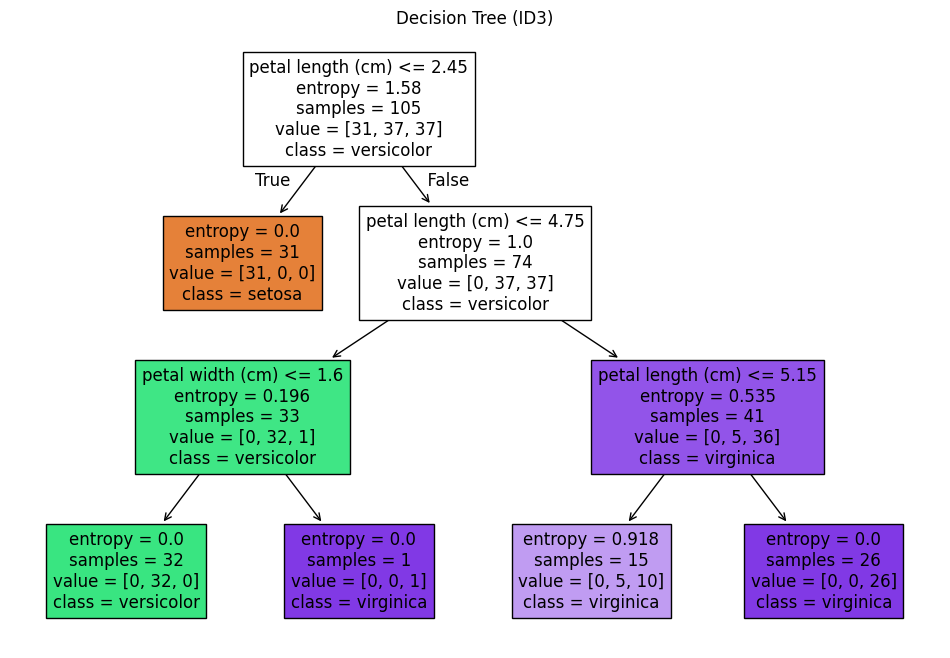

Accuracy: 0.98
New Sample Classification: setosa


In [6]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], df['target'], test_size=0.3, random_state=42)
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42).fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title('Decision Tree (ID3)')
plt.show()

predictions = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")

new_sample = pd.DataFrame([float(input(f"Enter value for {feature}: ")) for feature in iris.feature_names]).T
new_sample.columns = iris.feature_names
prediction = model.predict(new_sample)
print(f"New Sample Classification: {iris.target_names[prediction][0]}")